# **i. Perkenalan**


Graded Challenge 4

Nama : Rivaldi Valensia

Batch : HCK-007


Problem statement : Sebagai seorang data scientist, saya akan melakukan pengujian model machine learning untuk memperkirakan tarif perjalanan pada layanan ride-hailing Uber dan Lyft. Dengan memanfaatkan data historis tentang perjalanan sebelumnya, informasi geografis, waktu, faktor lalu lintas, cuaca, dan fitur lain yang relevan, saya membuat model yang akurat menggunakan regresi linear untuk membantu pengguna dan penyedia layanan memperkirakan biaya perjalanan dengan lebih baik.

# **ii. Import Libraries**


In [3]:
# Import Library

# Library for data exploration & cleaning
import pandas as pd 

# Library for data calculation
import numpy as np 

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for correlation
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import linregress

# Library for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer

# Library for splitting data
from sklearn.model_selection import train_test_split

# Library for model training
from sklearn.linear_model import LinearRegression

# Library for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# Library for model saving
import pickle

Mengimport banyak library dan mengumpulkan code tersebut dalam satu cell bertujuan untuk mengefisiensikan baris code dan menghindari pengulangan import library pada saat menggunakan library yang sama.


# **iii. Data Loading**


Dataset yang digunakan merupakan dataset yang diambil kaggle dan telah diformat ke file csv. Dataset dapat diakses melalui [link](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) berikut


In [4]:
# Import data from csv file
data_raw = pd.read_csv("rideshare_kaggle.csv")
data_raw

FileNotFoundError: [Errno 2] No such file or directory: 'rideshare_kaggle.csv'

Dataset yang telah diubah menjadi csv lalu diimport menggunakan library pandas dan dijadikan suatu dataframe berbentuk tabel


# **iv. Exploratory Data Analysis**


Kita akan melakukan eksplorasi data analisis guna memahami data, mengidentifikasi masalah yang ditemui dan melakukan persiapan awal untuk dianalisis lebih lanjut.


## A. Problem Overview


Problem Definition : Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

Objectives :

- Mampu memahami konsep regression dengan Linear Regression.
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi.


## B. Data Understanding


Langkah ini dilakukan guna memahami data dan pengecekan pola yang ada pada dataframe seperti pengecekan nama dan jumlah kolom, pengecekan missing value, pengecekan data duplikat dan lain-lain


In [ ]:
# Show top 5 data of dataset
data_raw.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Menampilkan 5 data teratas sesuai index dari dataframe


In [ ]:
#Show basic information
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Menampilkan informasi dasar mengenai dataframe seperti nama kolom, tipe data dan lain-lain


In [ ]:
# Show shape of dataframe
data_raw.shape

(693071, 57)

Menampilkan ukuran tabel yang mempunyai 693071 baris dan 57 kolom


In [ ]:
# Show name of all columns
data_raw.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Menampilkan nama kolom secara keseluruhan


**Keterangan nama kolom pada dataframe:**

| Nama Kolom                  | Keterangan                                                                   |
| --------------------------- | ---------------------------------------------------------------------------- |
| id                          | nomor unik yang dibuat secara auto increment untuk setiap baris yang diinput |
| timestamp                   | waktu detail saat pelanggan melakukan perjalanan                             |
| hour                        | jam saat perjalanan dimulai                                                  |
| month                       | bulan saat perjalanan dimulai                                                |
| datetime                    | waktu saat perjalanan dimulai, format DD/MM/YY                               |
| timezone                    | zona waktu tertentu di suatu tempat                                          |
| source                      | lokasi awal jemput                                                           |
| destination                 | lokasi tujuan                                                                |
| cab_type                    | jenis taksi (uber atau lyft)                                                 |
| product_id                  | kode unik untuk suatu transaksi perjalanan                                   |
| name                        | nama mobil                                                                   |
| price                       | harga atau tarif                                                             |
| distance                    | jarak yang ditempuh                                                          |
| surge_multiplier            | rasio pengganda tarif                                                        |
| latitude                    | garis lintang lokasi                                                         |
| longitude                   | garis bujur lokasi                                                           |
| temperature                 | suhu lokasi awal perjalanan                                                  |
| apparentTemperature         | suhu yang dirasakan pada awal perjalanan                                     |
| short_summary               | ringkasan cuaca                                                              |
| long_summary                | deskripsi cuaca                                                              |
| precipIntensity             | intensitas curah hujan                                                       |
| precipProbability           | probabilitas curah hujan                                                     |
| humidity                    | kelembaban udara                                                             |
| windSpeed                   | kecepatan angin                                                              |
| windGust                    | kecepatan rata-rata dari lonjakan angin                                      |
| windGustTime                | waktu saat lonjakan angin terjadi                                            |
| visibility                  | jarak pandang di perjalanan                                                  |
| temperatureHigh             | suhu tertinggi                                                               |
| temperatureHighTime         | waktu pada saat suhu tertinggi terjadi                                       |
| temperatureLow              | suhu terendah                                                                |
| temperatureLowTime          | waktu pada saat suhu terendah terjadi                                        |
| apparentTemperatureHigh     | suhu tertinggi yang dirasakan                                                |
| apparentTemperatureHighTime | waktu pada saat suhu tertinggi dirasakan                                     |
| apparentTemperatureLow      | suhu terendah yang dirasakan                                                 |
| apparentTemperatureLowTime  | waktu pada saat suhu terendah dirasakan                                      |
| icon                        | ikon cuaca                                                                   |
| dewPoint                    | titik embun                                                                  |
| pressure                    | tekanan udara                                                                |
| windBearing                 | arah angin                                                                   |
| cloudCover                  | persentase tutupan awan                                                      |
| uvIndex                     | indeks radiasi ultraviolet                                                   |
| visibility.1                | jarak pandang di perjalanan                                                  |
| ozone                       | konsentrasi ozon                                                             |
| sunriseTime                 | waktu terbit matahari                                                        |
| sunsetTime                  | waktu terbenam matahari                                                      |
| moonPhase                   | fase bulan                                                                   |
| precipIntensityMax          | intensitas presipitasi maksimum                                              |
| uvIndexTime                 | waktu ketika uvIndex terjadi                                                 |
| temperatureMin              | suhu minimum                                                                 |
| temperatureMinTime          | waktu ketika suhu minimum terjadi                                            |
| temperatureMax              | suhu maksimum                                                                |
| temperatureMaxTime          | waktu ketika suhu maksimum terjadi                                           |
| apparentTemperatureMin      | waktu ketika suhu maksimum yang dirasakan terjadi                            |
| apparentTemperatureMinTime  | suhu minimum yang dirasakan pada hari itu                                    |
| apparentTemperatureMax      | suhu maksimum yang dirasakan pada hari itu                                   |
| apparentTemperatureMaxTime  | suhu maksimum yang dirasakan pada hari itu                                   |


In [ ]:
# # Selects numeric columns
numeric = data_raw.select_dtypes(include=['int64', 'float64']).columns

# Selects categorical columns
category = data_raw.select_dtypes(include=['object']).columns


Membagi dataframe berdasarkan tipe data pada kolomnya nya yaitu numerikal dan kategorikal


In [ ]:
# Define variable
num = numeric.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data numerikal adalah :", num, "kolom", "\n","\n", numeric)

Jumlah kolom yang bertipe data numerikal adalah : 46 kolom 
 
 Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data numerikal


In [ ]:
# Define variable
cat = category.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data kategorikal adalah :",cat, "kolom", "\n","\n",category)

Jumlah kolom yang bertipe data kategorikal adalah : 11 kolom 
 
 Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data kategorikal


In [ ]:
# Check duplicate rows
data_raw.duplicated().sum()

0

Mengecek jumlah baris yang duplikat pada dataframe. Ditemukan bahwa tidak ada baris yang terduplikasi


In [ ]:
# Check duplicated column
column_duplicate = data_raw['visibility'] == data_raw['visibility.1']
column_duplicate

0         True
1         True
2         True
3         True
4         True
          ... 
693066    True
693067    True
693068    True
693069    True
693070    True
Length: 693071, dtype: bool

Setelah membaca dataframe, saya mencurigai adanya kolom yang terduplikasi. Maka, saya melakukan pengecekan kolom duplikat dan saya mendapati bahwa kolom visibility dan visibility.1 memang merupakan kolom yang terduplikat. Pada langkah data cleaning, akan dilakukan handling duplikasi kolom tersebut


In [ ]:
# Check missing value
data_raw.isnull().sum().sum()

55095

Mengecek jumlah missing value pada dataframe dan ditemukan sebanyak 55095 missing value. Missing value tersebut akan di handling pada langkah selanjutnya.


In [ ]:
# Find columns with missing values
data_raw.isnull().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                           True
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

Mengecek kolom apa yang ada missing value nya. Kolom price adalah satu-satunya kolom yang terdapat missing value. Pada langkah data cleaning, akan dilakukan handling missing value pada kolom tersebut.


In [ ]:
# Percentage of missing value
data_raw['price'].isnull().sum().sum()/len(data_raw)*100

7.949402009317949

Mengecek persentase jumlah missing value. Persentase missing value adalah 7.95% dari total baris yang ada di kolom price.


In [ ]:
# Showing descriptive statistics for numeric columns
data_raw[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Mengecek ringkasan statistik seperti nilai rata-rata, nilai minimum dan maksimum pada data yang bertipe numerikal


In [ ]:
# Returns the number of unique values ​​in each column of data_raw
data_raw.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Menampilkan jumlah unik value yang ada di setiap kolom


## C. Data Cleaning


Pada langkah ini akan dilakukan pembersihan data, guna menyiapkan data agar dapat digunakan untuk membuat model linear regresi. Langkah yang akan dilakukan pada data cleaning meliputi handling missing value, pengubahan tipe data dan lain-lain.


### 1. Drop missing value


In [ ]:
# Drop missing value for price column
data_raw = data_raw.dropna().reset_index(drop=True)

Setelah dilakukan pengecekan missing value, kita mendapat informasi bahwa seluruh missing value ada didalam kolom price. Saya berasumsi bahwa jika persentase missing value <10% dan apabila dengan data yang tersisa masih mampu menghasilkan informasi yang akurat, maka missing value tersebut dapat dihilangkan dengan cara drop missing value.


In [ ]:
# Count missing value
data_raw.isnull().sum().sum()

0

Dataframe sudah bersih dari missing value.


### 2. Drop duplicated column


In [ ]:
# Drop column
data_raw = data_raw.drop(['visibility.1'], axis=1)

Pada langkah data understanding, ditemukan bahwa kolom visibility.1 merupakan kolom yang terduplikasi dari kolom visibility. Maka dari itu, dilakukan penghapusan kolom guna menghilangkan bias pada analisa data nantinya.


In [ ]:
# Check for existence of column 'visibility.1' using if-else
if 'visibility.1' not in data_raw.columns:
    print("Kolom visibility.1 tidak ada dalam data_raw.")
else:
    data_raw.drop(columns=['visibility.1'], inplace=True)
    print("Kolom visibility.1 berhasil dihapus.")

Kolom visibility.1 tidak ada dalam data_raw.


Memastikan bahwa kolom visibility.1 sudah dihapus


### 3. Change data type


In [ ]:
# Show info of datetime column
data_raw['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 637976 entries, 0 to 637975
Series name: datetime
Non-Null Count   Dtype 
--------------   ----- 
637976 non-null  object
dtypes: object(1)
memory usage: 4.9+ MB


Kolom datetime tidak seharusnya bertipe object, maka dari itu kita mengubah tipe data nya menjadi tipe data yang sesuai


In [ ]:
# Change datatype
data_raw['datetime'] = pd.to_datetime(data_raw['datetime'])

Melakukan proses perubahan tipe data menjadi tipe data yang sesuai berdasarkan hasil analisis.


In [ ]:
# Check info of 2 column after changing the datatype
data_raw['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 637976 entries, 0 to 637975
Series name: datetime
Non-Null Count   Dtype         
--------------   -----         
637976 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.9 MB


Mengecek tipe data untuk 2 kolom tersebut


### 4. Dataframe after data cleaning



In [ ]:
# Define variable for new dataframe
data_clean = data_raw
data_clean

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637972,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637973,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637974,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Membuat dataframe baru yaitu data_clean untuk menyimpan data yang telah sudah dicleaning sebelumnya


In [ ]:
# Check info of new dataframe
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                      

Menampilkan informasi dasar dari dataframe baru


## D. Data Visualization

Langkah ini dilakukan untuk membandingankan antara data atau kelompok data dengan lebih mudah dalam membantu pemahaman terhadap data

### Bar Chart between Uber & Lyft

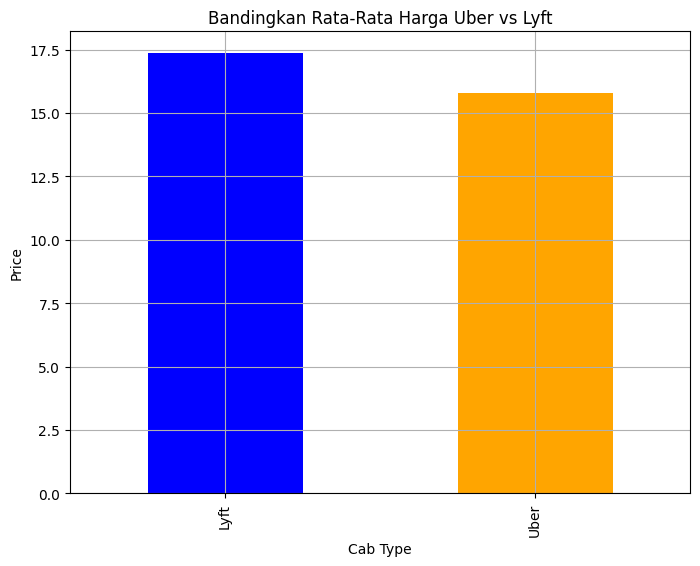

In [ ]:
# Calculates average price
mean_price_by_cab_type = data_clean.groupby('cab_type')['price'].mean()

# Membuat bar chart
plt.figure(figsize=(8, 6))
mean_price_by_cab_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Bandingkan Rata-Rata Harga Uber vs Lyft')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Uber mempunyai harga rata-rata yang lebih murah daripada lyft

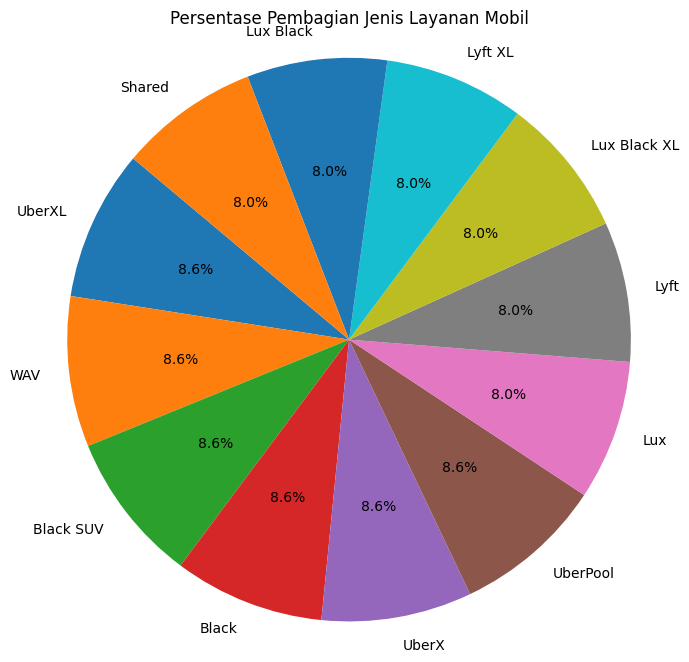

In [ ]:
# Calculates the percentage of name distribution
name_counts = data_clean['name'].value_counts()
name_percentages = (name_counts / name_counts.sum()) * 100

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(name_percentages, labels=name_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pembagian Jenis Layanan Mobil')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Pembagian persentase rata-rata tipe mobil yang disukai pelanggan bisa dikatakan sama rata

# **v. Feature Engineering / Data Preprocessing**


Langkah ini dilakukan guna mempersiapkan data agar menjadi lebih sesuai untuk dimasukkan ke dalam model linear regresi


## A. Cardinality


Langkah ini dilakukan untuk mengukur jumlah nilai unik pada masing-masing kolom yang bertipe kategorikal


In [ ]:
# Define variable to Get a list of category column names with data type object from data_clean
cat_cardinal = data_clean.select_dtypes(include=['object']).columns.tolist()

Mendefinisikan variabel yang berisi data bertipe kategorikal


In [ ]:
# Looping to calculate and print the cardinality of each category column
for cardinal in cat_cardinal:
  print(f'Jumlah cardinality dari kolom {cardinal} adalah:', data_clean[cardinal].nunique())

Jumlah cardinality dari kolom id adalah: 637976
Jumlah cardinality dari kolom timezone adalah: 1
Jumlah cardinality dari kolom source adalah: 12
Jumlah cardinality dari kolom destination adalah: 12
Jumlah cardinality dari kolom cab_type adalah: 2
Jumlah cardinality dari kolom product_id adalah: 12
Jumlah cardinality dari kolom name adalah: 12
Jumlah cardinality dari kolom short_summary adalah: 9
Jumlah cardinality dari kolom long_summary adalah: 11
Jumlah cardinality dari kolom icon adalah: 7


Melakukan looping untuk menampilkan jumlah cardinality dari setiap kolom


## B. Heatmap Correlation for numerical column


Langkah ini dilakukan guna mencari hubungan korelasi antar kolom yang bertipe data numerikal


Melakukan pembagian grup heatmap berdasarkan informasi yang ada didalam masing-masing, serta penjelasan grup tersebut

1. temperature_heatmap = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan temperature
2. weather_heatmap = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan cuaca
3. period_heatmap = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan waktu atau periode
4. geographic_heatmap = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan lokasi geografis
5. distance_heatmap = Heatmap yang mengelompokkan beberapa kolom yang berkaitan dengan jarak

Serta melakukan looping untuk menampilkan heatmap tersebut secara berurutan


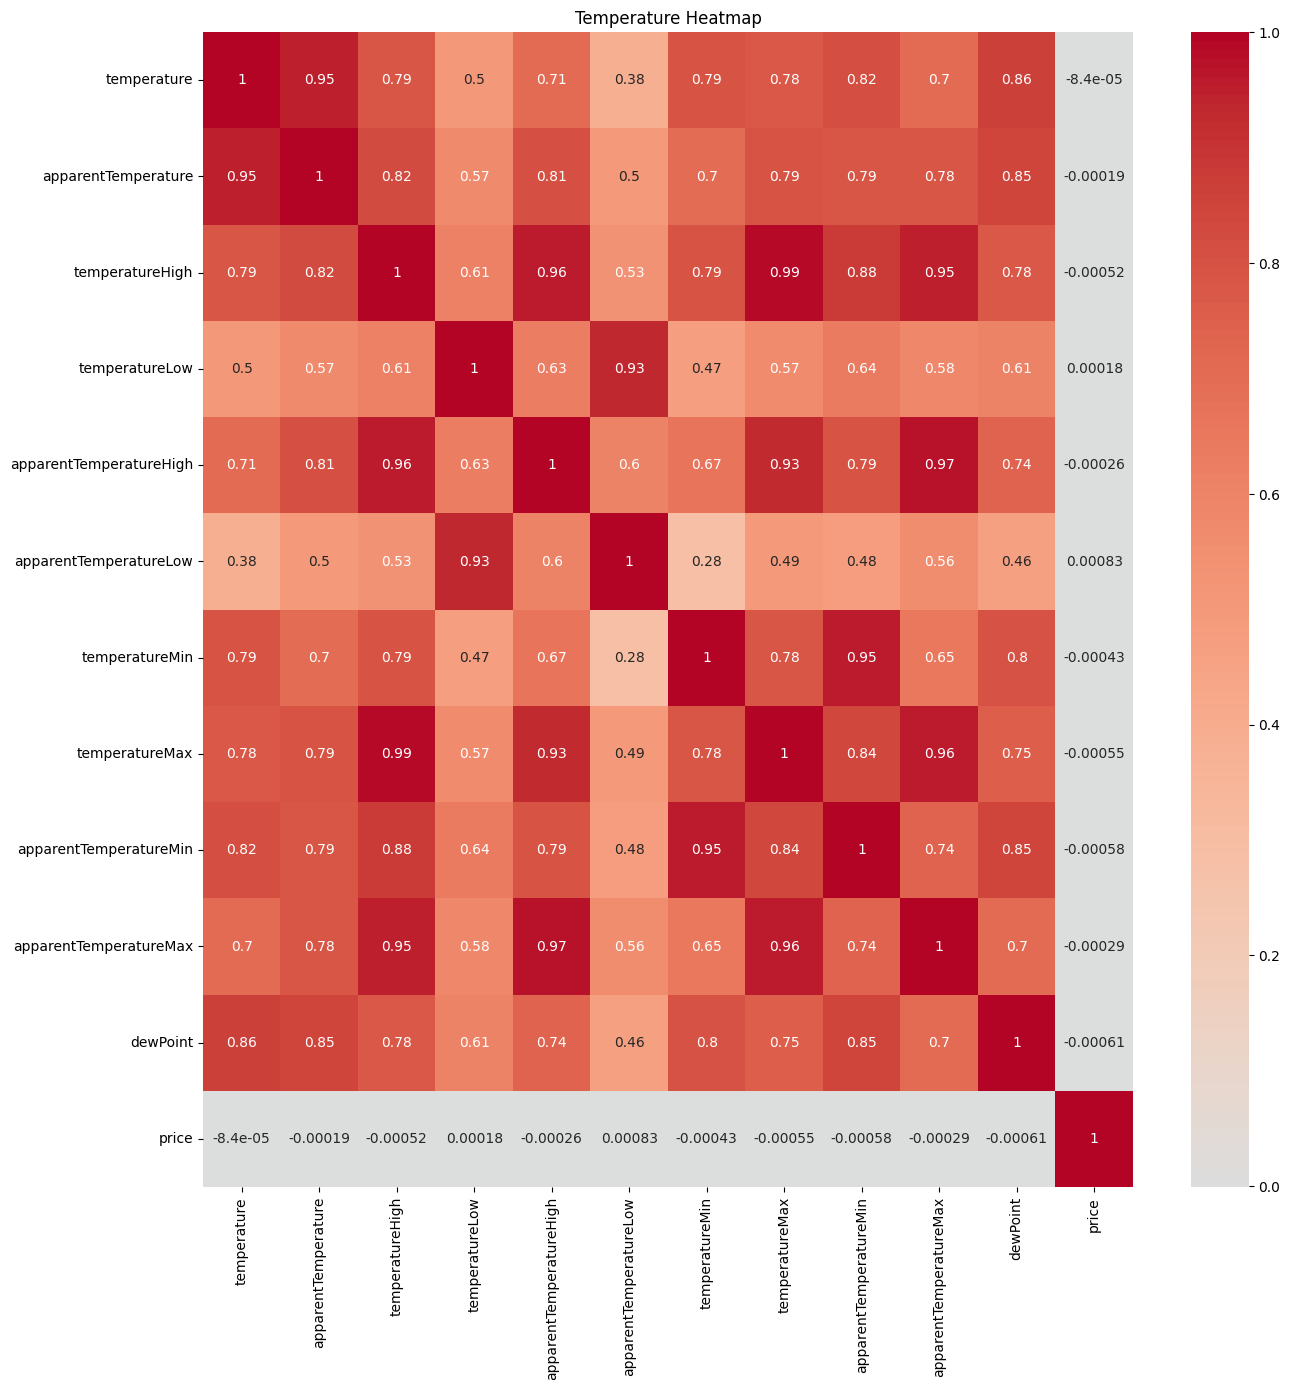

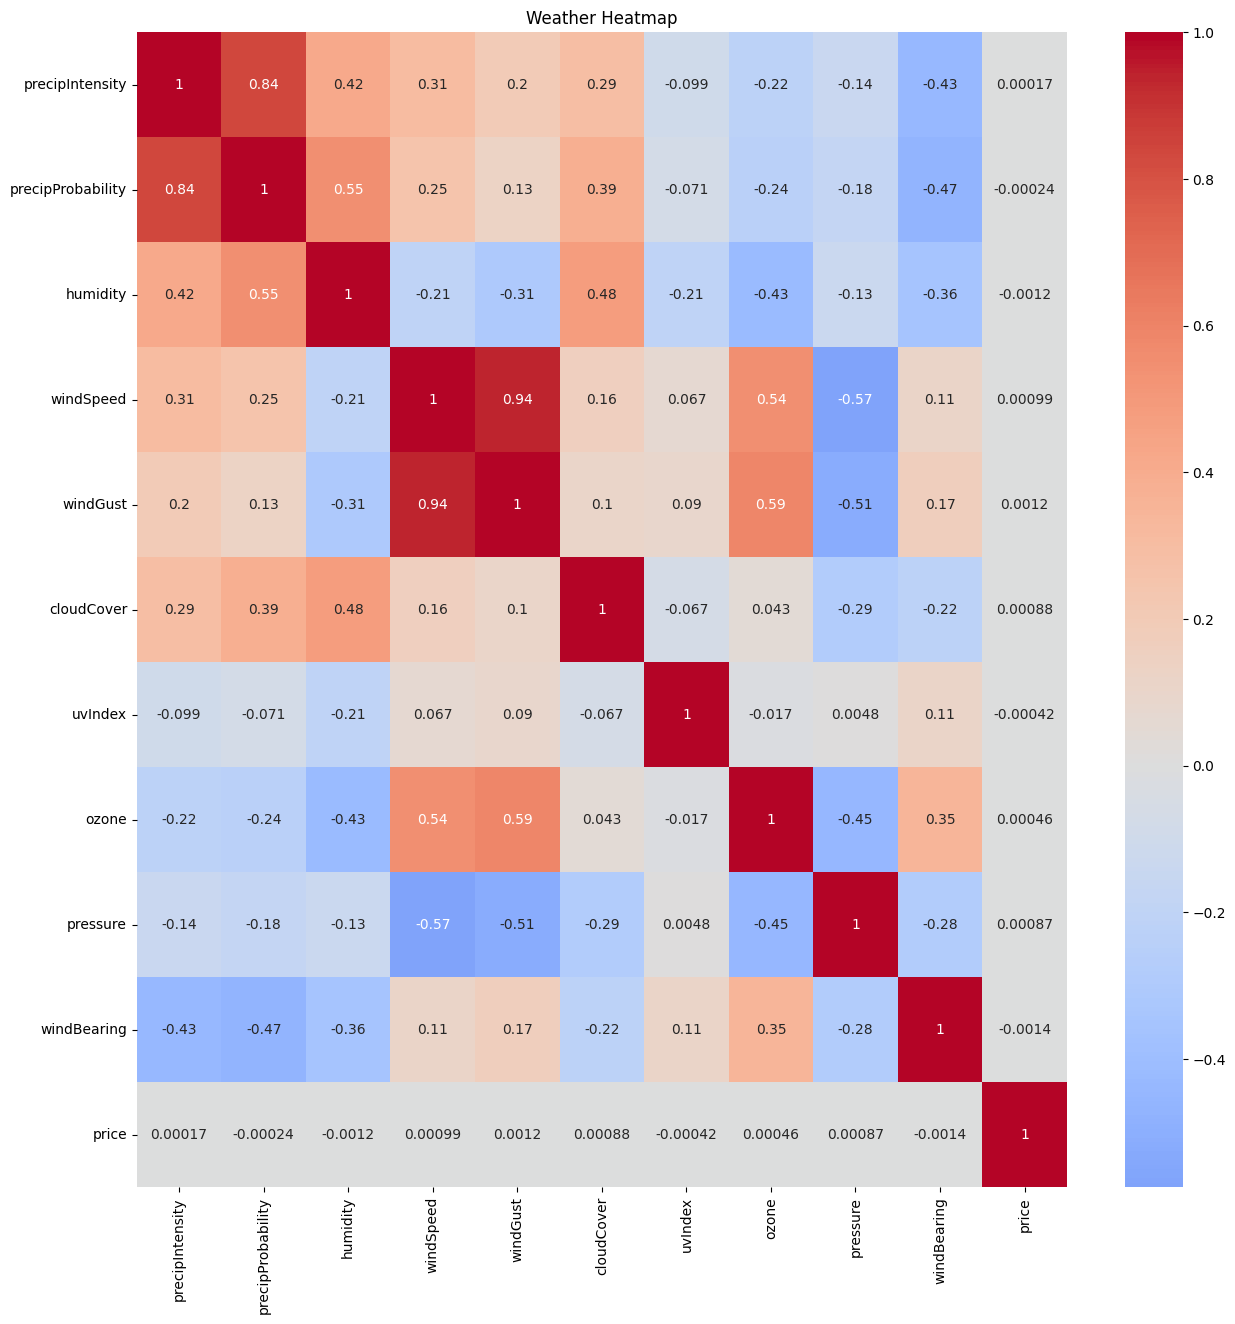

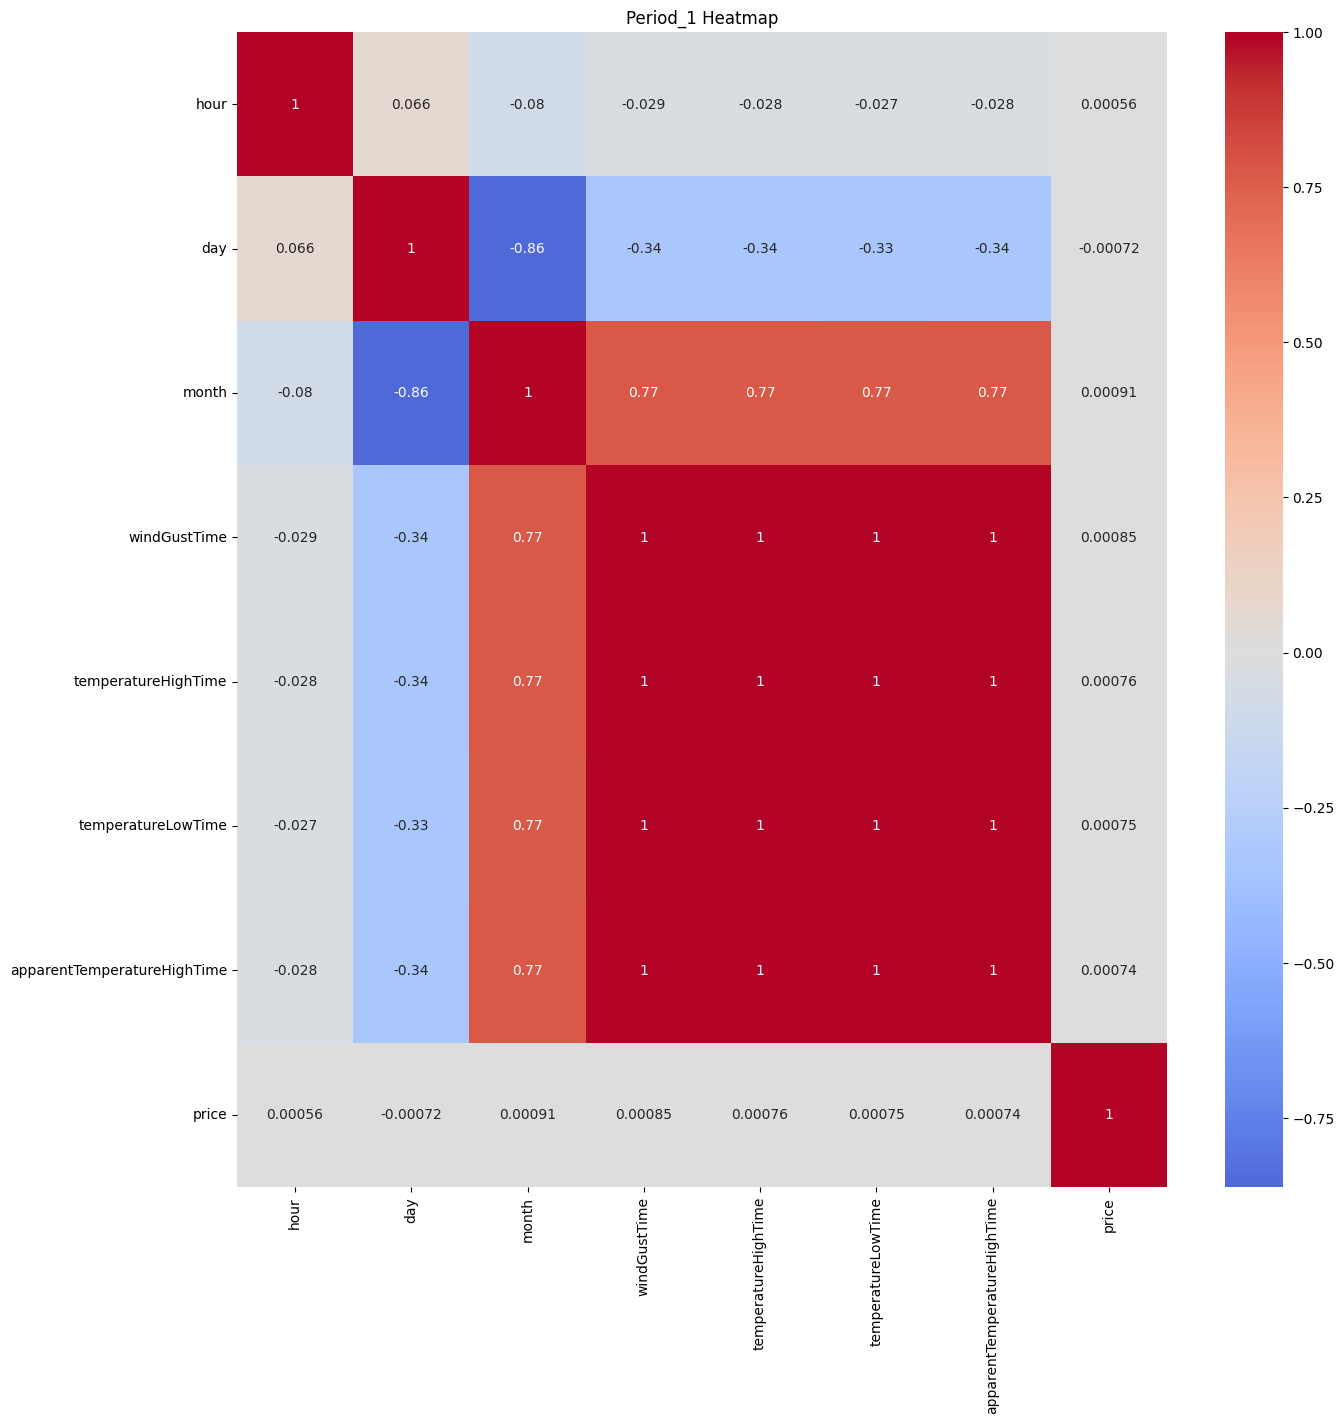

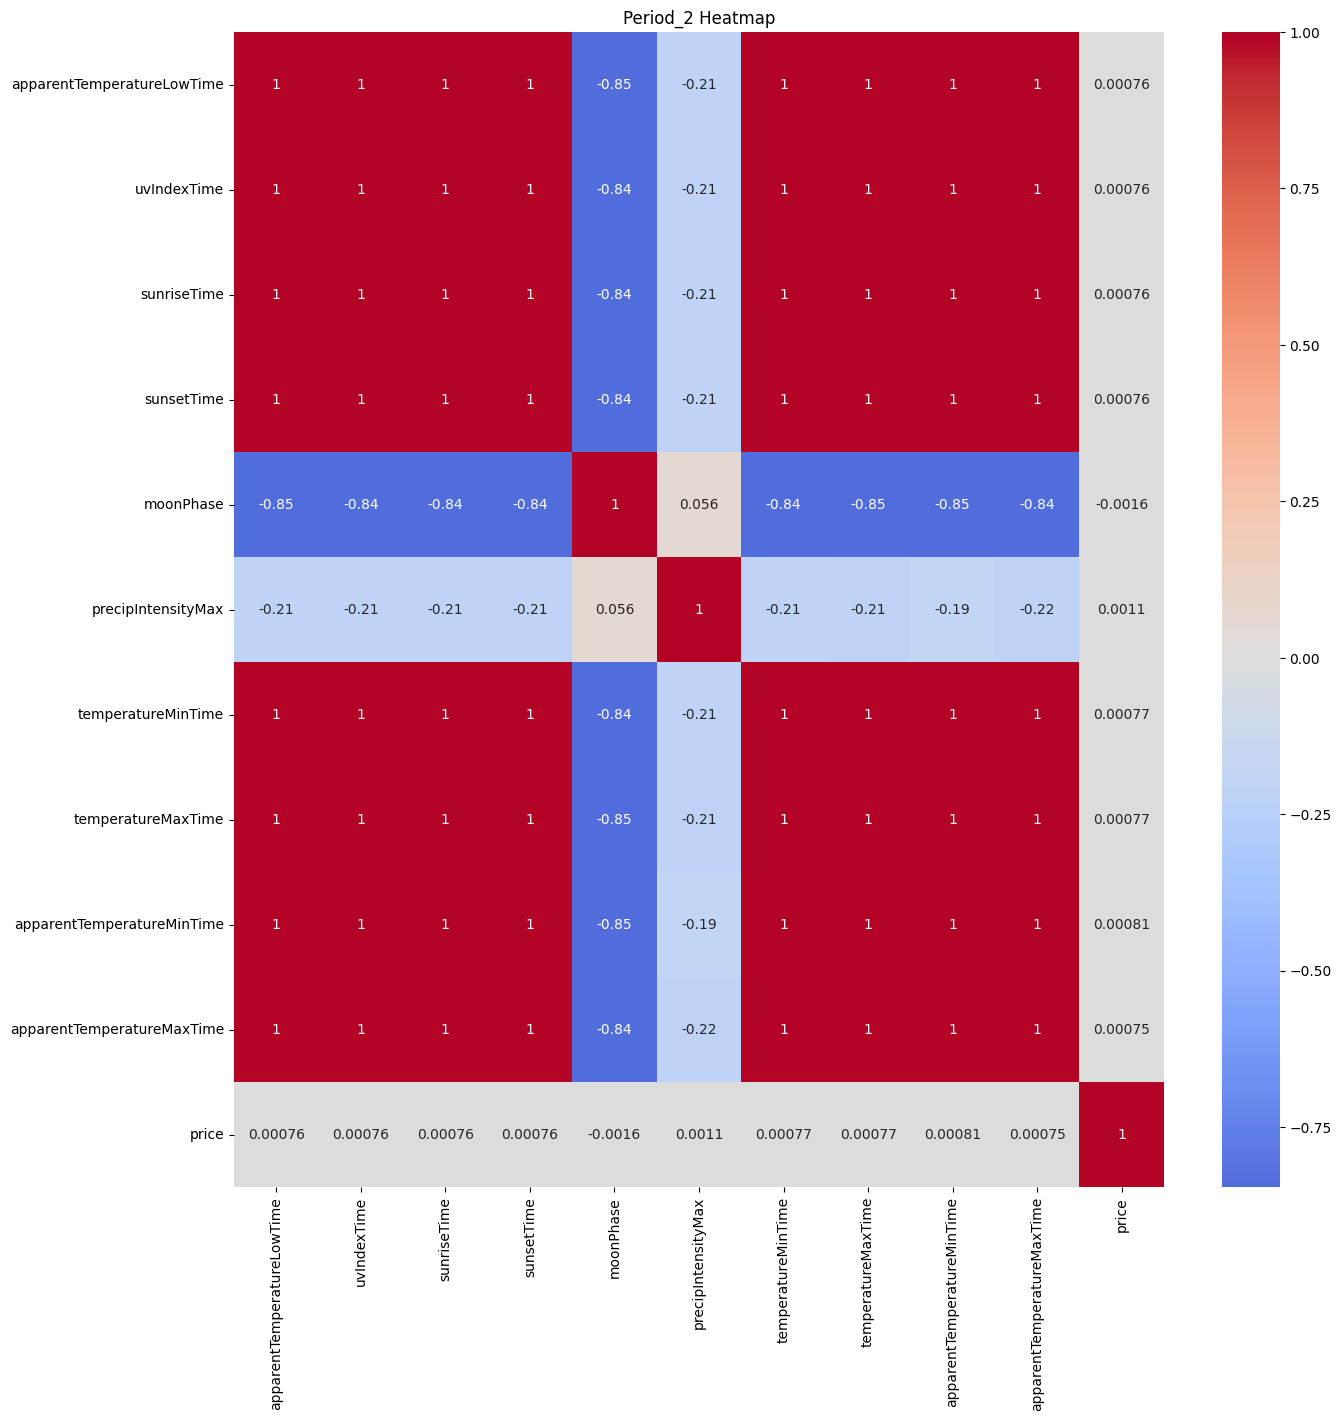

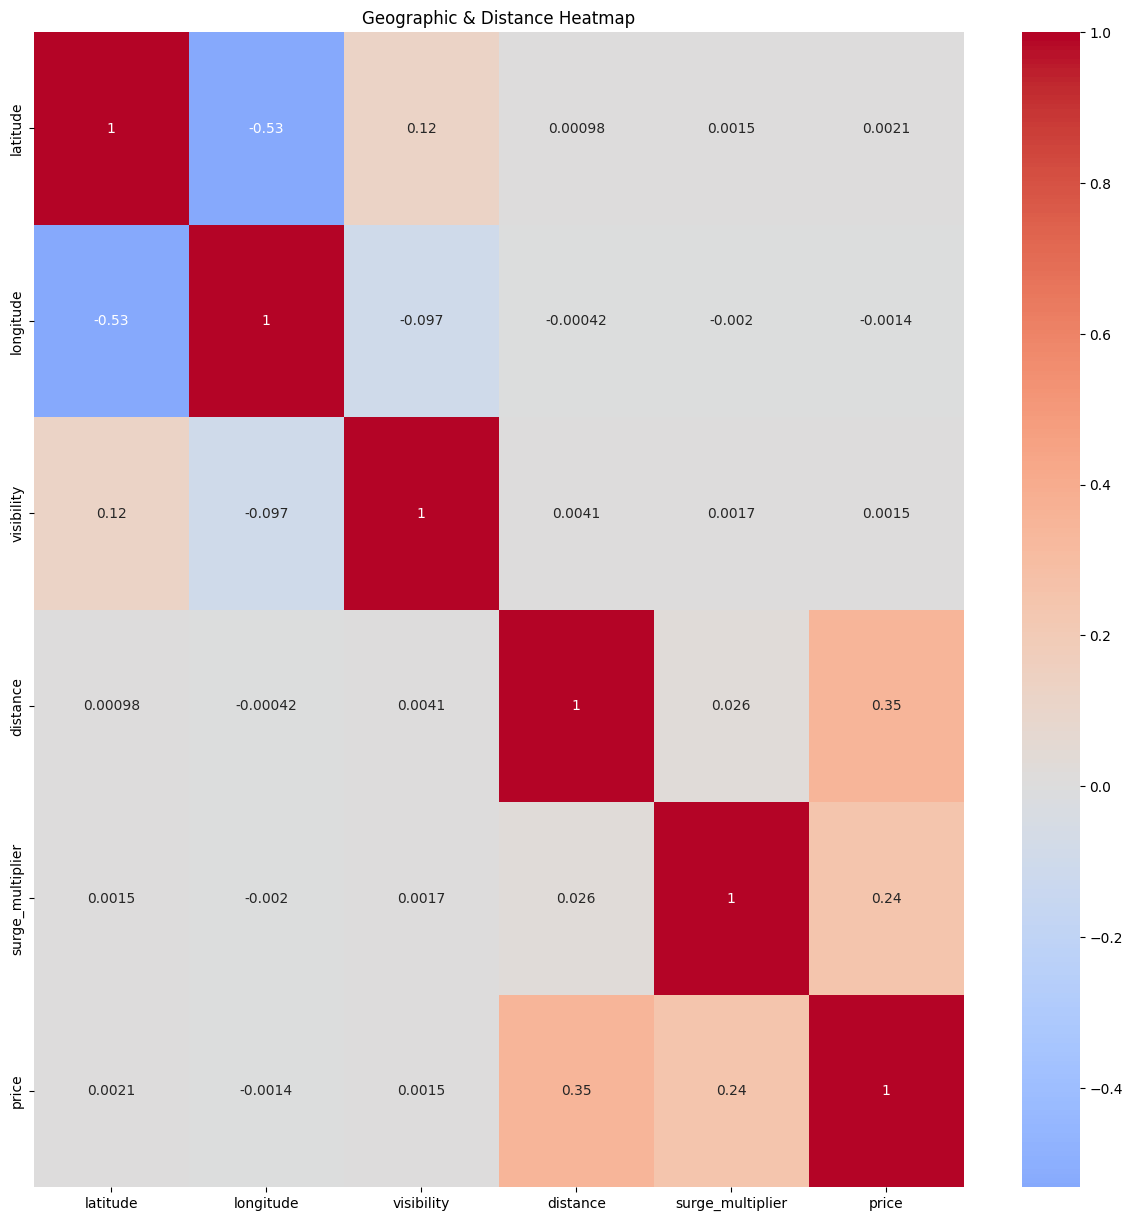

In [ ]:
# Definition of numeric columns for each heatmap group
heatmap_num = {
    'Temperature': ['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax', 'dewPoint', 'price'],
    'Weather': ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'cloudCover', 'uvIndex', 'ozone', 'pressure', 'windBearing', 'price'],
    'Period_1': ['hour', 'day', 'month', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'price'],
    'Period_2':['apparentTemperatureLowTime', 'uvIndexTime', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime', 'price'],
    'Geographic & Distance': ['latitude', 'longitude', 'visibility', 'distance', 'surge_multiplier', 'price']
}

# Looping to create and show a heatmap for each group of numeric fields
for i, column in heatmap_num.items():
    i_heatmap_num = data_clean[column]
    corr_matrix = i_heatmap_num.corr()
    
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{i} Heatmap')
    plt.show()

Berdasarkan heatmap correlation yang telah divisualisasikan diatas, kita dapat mendapatkan informasi bahwa:

1. Pada Temperature Heatmap, Weather Heatmap, Period_1 Heatmap dan Period_2 Heatmap, korelasi kolom price sebagai target atau y dengan kolom lain sebagai feature atau x sangat kecil dan mendekati 0. Maka dari itu, semua feature yang ada pada beberapa heatmap tersebut sebaiknya didrop atau dihilangkan.
2. Pada Geographic & Distance Heatmap, kolom distance dan surge_multiplier adalah kolom yang memiliki nilai korelasi terbesar terhadap kolom target(price) diantara semua kolom. Maka dari itu, 2 kolom tersebut dipertahankan


## C. Kendalltau Correlation for categorical column

Langkah ini dilakukan untuk mengukur sejauh mana urutan relatif antara pasangan pengamatan dalam dua variabel cocok.

In [ ]:
# Select columns of type object (category)
categorical_columns = data_clean.select_dtypes(include=['object']).columns

# Loop through each category column and calculate the controllable correlation with 'price'
for col in categorical_columns:
    correlation, p_value = kendalltau(data_clean[col], data_clean['price'])
    print(f"Korelasi Kendalltau antara {col} dan price:", correlation)

Korelasi Kendalltau antara id dan price: 0.0003143976537751096
Korelasi Kendalltau antara timezone dan price: nan
Korelasi Kendalltau antara source dan price: -0.013055772826511497
Korelasi Kendalltau antara destination dan price: -0.03151675812702735
Korelasi Kendalltau antara cab_type dan price: -0.057004480669791274
Korelasi Kendalltau antara product_id dan price: 0.05077238589375829
Korelasi Kendalltau antara name dan price: -0.39709440059363416
Korelasi Kendalltau antara short_summary dan price: 0.00026118857283030585
Korelasi Kendalltau antara long_summary dan price: 0.0008231820404319457
Korelasi Kendalltau antara icon dan price: 0.0014072307863441582


Korelasi tertinggi adalah surge_multiplier dengan price, dan korelasi terendah adalah name dengan price

## D. Feature Selection


Langkah ini dilakukan untuk menghindari overfitting dan menghindari masalah yang mungkin timbul akibat adanya fitur-fitur yang tidak relevan. Berdasarkan problem overview, disepakati bahwa kolom 'price' adalah target atau Y dan kolom lainnya adalah feature atau X.


### 1. Categorical Column Selection


In [ ]:
# List to store column names with significant correlations
korelasi_cat = []
selected_cat = []

# Define variable to save what columns are included in the correlation calculation
corr_cat= data_clean.select_dtypes(include=['object']).columns

Membuat list korelasi_cat dan selected_cat untuk menyimpan hasil perhitungan selection serta membuat variabel corr_cat untuk menyimpan kolom apa saja yang diikutsertakan dalam feature selection

- Korelasi_cat untuk menyimpan hasil perhitungan korelasi kolom/feature dengan target
- Selected_cat untuk menyimpan hasil perhitungan kolom/feature dengan kolom/feature lainnya


In [ ]:
# Looping to calculate feature correlation with target
for i in corr_cat:
    correlation, p_value = kendalltau(data_clean['price'], data_clean[i])

# Set threshold to 0.05 to remove columns that don't fulfil the threshold
    if p_value < 0.05:
        korelasi_cat.append(i)
        selected_cat.append(i)

# Create a dataframe containing a p-value column >= 0.05
selected_feat_cat = data_clean[selected_cat]

# Show dataframe
selected_feat_cat

,source,destination,cab_type,product_id,name
0,Haymarket Square,North Station,Lyft,lyft_line,Shared
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux
2,Haymarket Square,North Station,Lyft,lyft,Lyft
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL
...,...,...,...,...,...
637971,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


Membuat threshold p-value = 0.05 untuk mengeliminasi kolom yang tidak mempunyai hubungan kuat dengan kolom lainnya. Serta melakukan looping untuk menampilkan kolom yang mempunyai hubungan diatas p-value. Hanya ada kolom source, destination, cab_type, name dan surge_multiplier berdasarkan hasil perhitungan korelasi categorical column.


### 2. Numerical Column Selection


In [ ]:
#Calculates the correlation matrix between numeric features in data_clean
correlation_matrix = data_clean.corr()

#Take the correlation series between 'price' and other numeric features
correlation_with_price = correlation_matrix['price']

# Select only those features with a correlation of more than 0.1 to 'price'
selected_corr = correlation_with_price[correlation_with_price > 0.1].index.tolist()

# Create a new Dataframe containing only selected features
selected_feat_num = data_clean[selected_corr]
selected_feat_num = selected_feat_num.drop(columns=['price'])

# Show Dataframe
selected_feat_num

/var/folders/ql/frp_2vtj73b8wzqpxkl9d5r00000gp/T/ipykernel_4993/967232442.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_clean.corr()


,distance,surge_multiplier
0,0.44,1.0
1,0.44,1.0
2,0.44,1.0
3,0.44,1.0
4,0.44,1.0
...,...,...
637971,1.00,1.0
637972,1.00,1.0
637973,1.00,1.0
637974,1.00,1.0


Berdasarkan hasil feature selection menggunakan korelasi dari antar kolom numerik, maka kita mendapatkan distance sebagai feature/x dari numerical column. Sebelumnya, kita sudah mengecek korelasi berdasarkan heatmap. Dari kedua pengujian column selection dan heatmap correlation, hasilnya cocok yaitu distance sebagai feature/x


In [ ]:
# Merge dataframe for selected categorical and numeric into one dataframe
df_feature = pd.concat([selected_feat_cat, selected_feat_num], axis=1)

# Added column price to df_feature
df_feature['price'] = data_clean['price']

# Reset index of dataframe feature and remove old index column
df_feature.reset_index(drop=True)

,source,destination,cab_type,product_id,name,distance,surge_multiplier,price
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,1.0,5.0
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,1.0,11.0
2,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,1.0,7.0
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,1.0,26.0
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...,...,...,...
637971,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1.00,1.0,9.5
637972,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1.00,1.0,13.0
637973,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.00,1.0,9.5
637974,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.00,1.0,27.0


Didapatkan 6 kolom sebagai feature/x, 1 kolom bertipe numerical dan 5 lainnya bertipe categorical


### 3. Personal Judgement


In [ ]:
# Counts the number of unique values ​​in the 'product_id' column of data_clean
data_clean['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

Menampilkan unique value pada kolom product id


In [ ]:
# Counts the number of unique values ​​in the 'id' column of data_clean
data_clean['id'].nunique()

637976

Menampilkan jumlah unik values dari kolom id


In [ ]:
# Counts the number of unique values ​​in the 'timezone' column of data_clean
data_clean['timezone'].nunique()

1

Menampilkan jumlah unik values dari kolom id


- Berdasarkan hasil analisis pada categorical column, column product_id memiliki value yang tidak jelas, contohnya '6c84fd89-3f11-4782-9b50-97c468b19529'. Maka product_id tidak diikutsertakan dalam feature selection
- Berdasarkan hasil analisis dari heatmap correlation, kita hanya mengambil distance sebagai feature sebagai numerical column
- Berdasarkan hasil analisis, kolom id mempunyai jumlah unique values terlalu banyak dan kolom timezone hanya ada 1 unique value. Maka, kedua kolom tersebut tidak diikutsertakan dalam feature selection
- Berdasarkan hasil categorical column selection, source, destination, cab_type, product_id, name, surge_multiplier adalah kolom yang memiliki korelasi dengan price.
- Kolom source(tempat awal) dan destination(tujuan) dapat digantikan dengan kolom distance(jarak), dan cab_type(nama mobil) dapat digantikan dengan name(nama penyedia layanan).
- Selected column berdasarkan hasil analisis saya : Distance, Name, Price, Surge_multiplier


### 4. Selected Feature


In [ ]:
# Create a variable to separate the column you want to select
selected_columns = ['distance', 'price', 'name', 'surge_multiplier']

# Creates a new dataframe with columns taken from the original dataframe
feature = pd.DataFrame(data_clean[selected_columns])

# Show new dataframe
feature

,distance,price,name,surge_multiplier
0,0.44,5.0,Shared,1.0
1,0.44,11.0,Lux,1.0
2,0.44,7.0,Lyft,1.0
3,0.44,26.0,Lux Black XL,1.0
4,0.44,9.0,Lyft XL,1.0
...,...,...,...,...
637971,1.00,9.5,WAV,1.0
637972,1.00,13.0,UberXL,1.0
637973,1.00,9.5,UberX,1.0
637974,1.00,27.0,Black SUV,1.0


In [ ]:
feature_cat = feature[['name']]

In [ ]:
feature_num = feature [['distance', 'surge_multiplier']]

## E. Assumption of Linear Regression


Langkah ini dilakukan untuk memastikan bahwa hasil yang diperoleh dari model regresi linear adalah valid dan akurat


##### 1. Linear Relationship


In [ ]:
# Define new variable for X and y
y = data_clean['price']
x = feature['distance']

Mendefine variabel untuk memisahkan dua kolom bertipe numerik


In [ ]:
# Calculate linear regression between distance (x) and price (y)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

Mendefinisikan beberapa variabel untuk menyimpan nilai yang dihasilkan dari pemanggilan fungsi linregress()

- slope : berisi nilai kemiringan (koefisien regresi) dari garis regresi
- intercept : berisi intercept dari garis regresi. Ini adalah nilai price ketika distance adalah 0.
- r_value : berisi nilai koefisien korelasi Pearson antara distance dan price. Ini mengukur sejauh mana hubungan antara kedua variabel bisa dijelaskan dalam bentuk linear.
- p_value : berisi nilai p-value yang mengukur tingkat signifikansi dari hubungan linier antara distance dan price.
- std_err : berisi kesalahan standar dari perkiraan kemiringan garis regresi. Ini memberikan perkiraan seberapa akurat koefisien regresi.


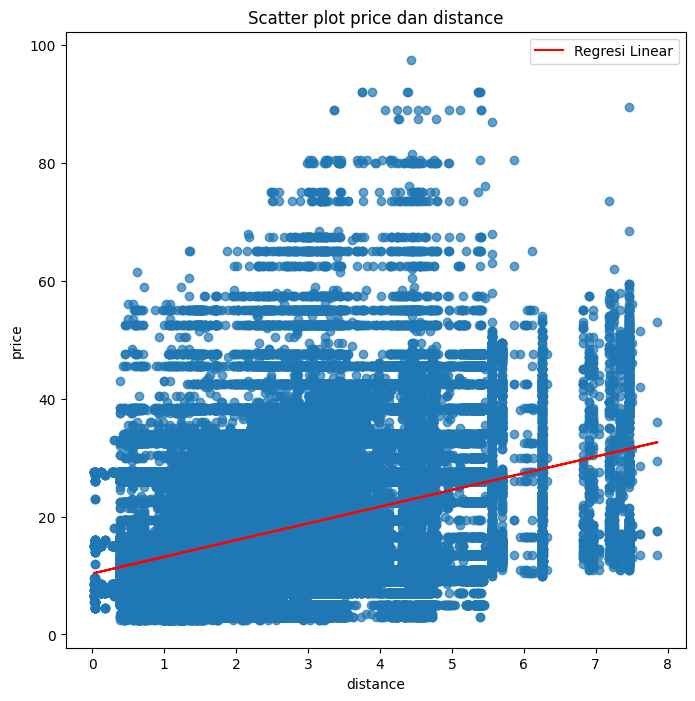

In [ ]:
# Create scatter plots for linear regression relationships
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, slope * x + intercept, color='red', label='Regresi Linear')
plt.title('Scatter plot price dan distance')
plt.xlabel('distance')
plt.ylabel('price')
plt.legend()
plt.show()

Dapat dilihat dari plot tersebut, ada korelasi positif antara price dan distance. Artinya, apabila jarak atau distance semakin jauh maka harga akan lebih tinggi


##### 2. Little or no multicollinearity


Asumsi ini tidak relevan karena feature(x) hanya ada 1 kolom yaitu distance


##### 3. Multivariate Normality


Asumsi ini tidak relevan karena feature(x) hanya ada 1 kolom yaitu distance


## F. Split Data


Tujuan utama dari pemisahan data adalah menghindari overfitting, di mana model belajar menghafal data pelatihan dan gagal bekerja dengan baik pada data baru.

In [ ]:
# Separate features and target
X = feature.drop('price', axis=1)
y = feature['price']

Memisahkan feature dan target. Df_feature adalah dataframe akhir yang dibuat setelah proses feature selection. X berisi semua kolom kecuali price, sedangkan y adalah kolom price saja


In [ ]:
# Separate data into data training and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Show result
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(510380, 3)
(127596, 3)
(510380,)
(127596,)


Membagi data menjadi dua jenis, yaitu data train dan data test. Data uji berisi 20% dari total keseluruhan data pada dataframe feature. Data test berisi feature dan target (x dan y)


In [ ]:
# Select numerical columns from X_train
X_train_num = X_train[['distance']]

# Select numerical columns from X_test
X_test_num = X_test[['distance']]

Membagi menjadi data train numerical dan data test numerical dan saya hanya memilih kolom distance sebagai numeric column karena kolom surge_multiplier bertipe numerik namun berurutan seperti categorical column

In [ ]:
# Show dataframe of X_train_num
X_train_num

,distance
367110,2.84
503541,1.41
629418,2.88
548373,4.54
132355,3.01
...,...
390321,2.66
8050,2.84
532212,0.02
281782,1.61


Menampilkan dataframe X_train_num

In [ ]:
# Show dataframe of X_test_num
X_test_num

,distance
529274,1.04
11800,2.84
344351,0.52
568024,1.73
560110,1.92
...,...
636376,3.01
59840,2.63
534146,1.73
633422,3.07


Menampilkan dataframe X_test_num

In [ ]:
# Select categorical columns from X_train
X_train_cat = X_train.select_dtypes(include=['object'])

# Select numerical columns from X_test
X_test_cat = X_test.select_dtypes(include=['object'])

Membagi menjadi data train categorical dan data test categorical

In [ ]:
# Show dataframe of X_train_cat
X_train_cat

,name
367110,Black SUV
503541,UberXL
629418,Lyft
548373,Lux Black XL
132355,Lux Black XL
...,...
390321,UberX
8050,WAV
532212,UberPool
281782,UberXL


Menampilkan dataframe X_train_cat

In [ ]:
# Show dataframe of X_test_cat
X_test_cat

,name
529274,Black
11800,UberPool
344351,UberXL
568024,Shared
560110,UberPool
...,...
636376,Black
59840,Lux
534146,Lux
633422,Black SUV


Menampilkan dataframe X_test_cat

In [ ]:
# Create a dataframe X_train_surge from the surge_multiplier column 
X_train_surge = pd.DataFrame(X_train, columns=['surge_multiplier'])

# Show result
X_train_surge

,surge_multiplier
367110,1.0
503541,1.0
629418,1.0
548373,1.0
132355,1.0
...,...
390321,1.0
8050,1.0
532212,1.0
281782,1.0


In [ ]:
# Create a dataframe X_test_surge from the surge_multiplier column 
X_test_surge = pd.DataFrame(X_test, columns=['surge_multiplier'])

# Show result
X_test_surge

,surge_multiplier
529274,1.0
11800,1.0
344351,1.0
568024,1.0
560110,1.0
...,...
636376,1.0
59840,1.0
534146,1.0
633422,1.0


Membuat X_train_surge untuk memisahkan kolom surge_multiplier dengan numeric column yang akan discaling nantinya

## G. EDA before modelling


Sama seperti EDA pada umumnya, pada langkah ini ditujukan lebih spesifik seperti mencari anomali data.

### Distance / Feature


In [ ]:
# Calculates the skewness of distance column in the feature DataFrame
feature['distance'].skew()

0.8168484903389348

Skew masih diangka 0.8 yang berarti masih bisa diasumsikan distribusi data normal

Terlihat bahwa distribusi data memiliki kemiringan yang masih dapat ditoleransi


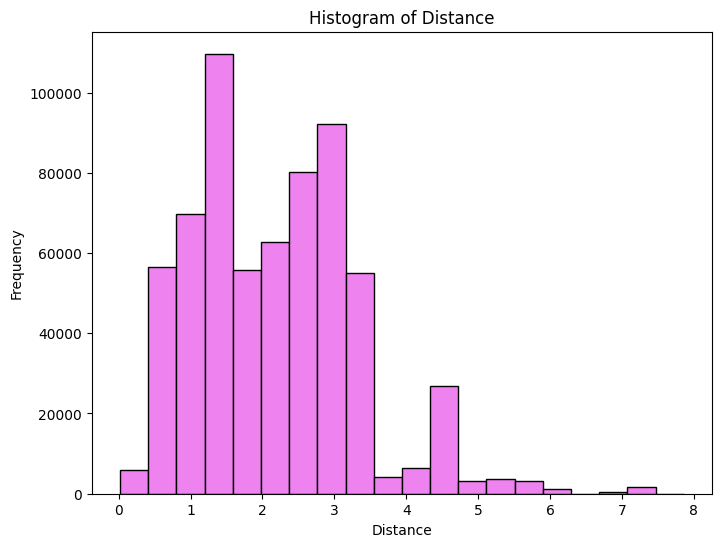

In [ ]:
# Create histograms of distance plot
plt.figure(figsize=(8, 6))
plt.hist(feature['distance'], bins=20, color='violet', edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

Distribusi data sebenarnya miring kekanan atau skew positif. Namun, karena hasil perhitungan skewness masih dibawah 1, maka kemiringan masih dapat ditoleransi dan dianggap distribusi data normal


### Price / Target


In [ ]:
# Calculates the skewness of price column in the feature DataFrame
feature['price'].skew()

1.0457470560899258

Skewness ekstrim, maka kita perlu untuk melakukan handling outlier pada kolom price

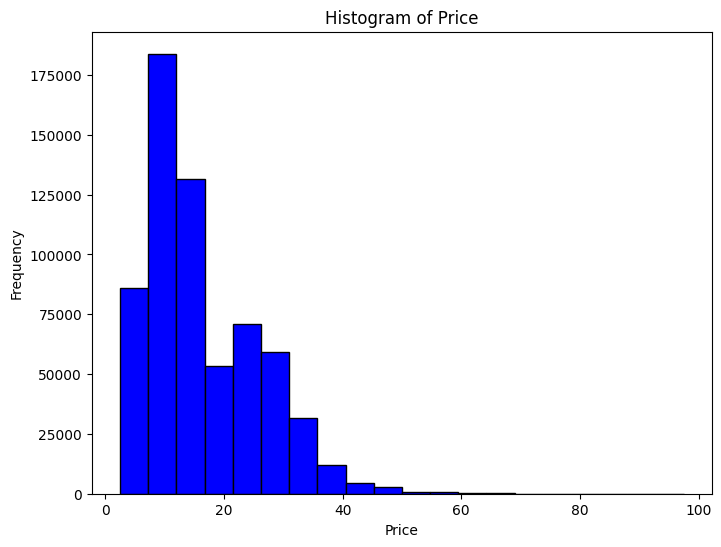

In [ ]:
# Create histograms of distance plot
plt.figure(figsize=(8, 6))
plt.hist(feature['price'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Seperti yang ditampilkan pada histogram, distribusi data kolom price tidak normal.

## I. Handling Outlier


Langkah ini dilakukan untuk meminimalisir terjadinya overfitting dan meningkatkan kinerja model machine learning nantinya

### Distance / Feature


In [ ]:
# Check skewness for X_train_num
X_train_num.skew()

distance    0.81469
dtype: float64

Skewness pada x_train dan x_test tidak jauh berbeda yaitu 0.8

In [ ]:
# Check skewness for X_train_num
X_test_num.skew()

distance    0.825347
dtype: float64

Karena perhitungan outlier 0.8, maka kita akan gunakan rumus Z-score nantinya dengan menghitung standar deviasi, upper & lower boundary

#### X_train_num


##### Calculate lower boundary & upper boundary

In [ ]:
#  Calculate mean and standard deviation from X train numerical column
mean_X_train = X_train_num.mean()
sdt_dev_X_train = X_train_num.std()

# Calculate upper boundary and lower boundary based on Z-Score
lower_bound = mean_X_train - 3 * sdt_dev_X_train
upper_bound = mean_X_train + 3 * sdt_dev_X_train

# Show result
print(f"Nilai rata-rata dari X_train_num adalah:", mean_X_train[0])
print(f"Nilai standar deviasi dari X_train_num adalah:", sdt_dev_X_train[0])
print(f"Nilai ambang batas bawah dari X_train_num adalah:", lower_bound[0])
print(f"Nilai ambang batas atas dari X_train_num adalah:", upper_bound[0])

Nilai rata-rata dari X_train_num adalah: 2.188865237666053
Nilai standar deviasi dari X_train_num adalah: 1.1345322434759033
Nilai ambang batas bawah dari X_train_num adalah: -1.2147314927616568
Nilai ambang batas atas dari X_train_num adalah: 5.592461968093763


Saya menggunakan rumus Z-Score dan threshold 3 \* std_dev karena saya beranggapan bahwa distribusi data X_train_num masih bisa dikatakan normal.


In [ ]:
# Count amount of outlier
outlier_count = np.sum((X_train_num < lower_bound) | (X_train_num > upper_bound))

# Calculate the total data in a column
total_data = len(X_train_num)

# Calculate the percentage of outliers
outlier_percentage = (outlier_count/total_data)*100

# Show amount of outlier and percentage of outlier
print(f"Jumlah outlier dalam data X train adalah: {outlier_count['distance']} outlier")
print(f'Persentase outlier dari data X train adalah: {int(outlier_percentage * 100)}%')

Jumlah outlier dalam data X train adalah: 3330 outlier
Persentase outlier dari data X train adalah: 65%


Total data yang outlier sejumlah 3330 baris data dan 65% total data adalah outlier. Maka dari itu, outlier tidak dapat dibuang dan harus dihandling menggunakan metode capping


##### Capping Method


In [ ]:
# Apply the Winsorizer technique
capping_test = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables=['distance'])

Saya menggunakan teknik capping / sensoring dengan library winsorizer karena data outlier cukup banyak dan jika dihapus maka akan mengganggu keakuratan perhitungan model nantinya. 

In [ ]:
# Apply the Winsorizer transformation to the data train
X_train_capped = capping_test.fit_transform(X_train_num)

# Show result
X_train_capped

,distance
367110,2.84
503541,1.41
629418,2.88
548373,4.54
132355,3.01
...,...
390321,2.66
8050,2.84
532212,0.02
281782,1.61


In [ ]:
# Show skewness after capping
X_train_capped.skew()

distance    0.616054
dtype: float64

Data sudah dicapping dan ada perubahan sekitar 0.2

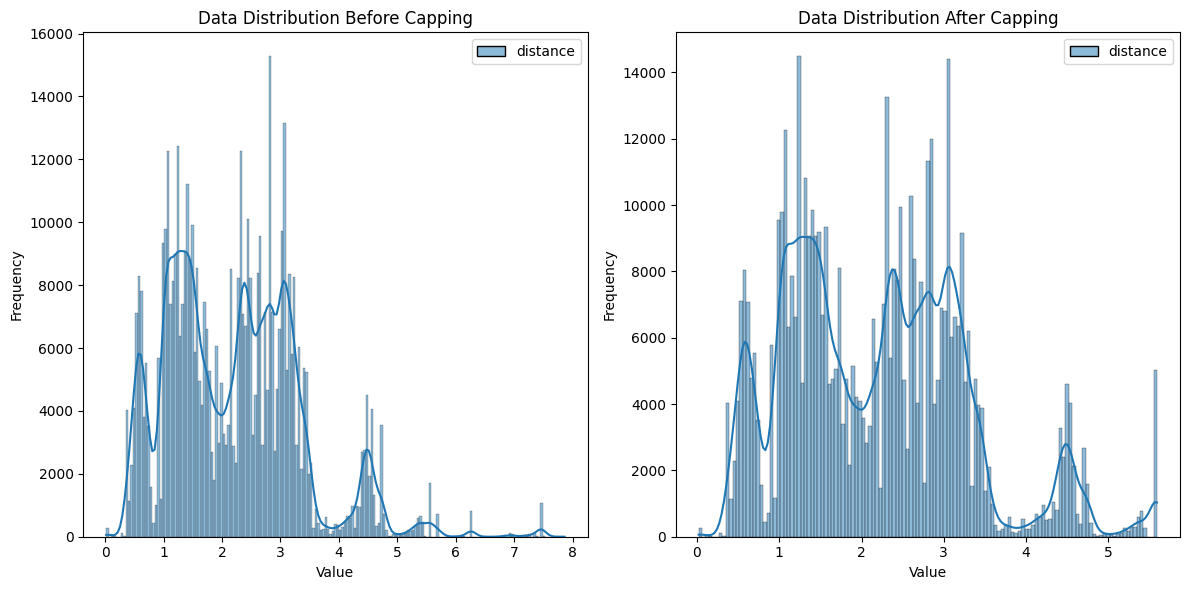

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data distribution before capping
sns.histplot(X_train_num, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Data Distribution Before Capping')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Plot data distribution after capping
sns.histplot(X_train_capped, kde=True, color='green', ax=axes[1])
axes[1].set_title('Data Distribution After Capping')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Terlihat dari visualisasi, bahwa distribusi data semakin mendekati normal

#### X_test_num

##### Calculate lower boundary & upper boundary

In [ ]:
#  Calculate mean and standard deviation from X test numerical column
mean_X_test = X_test_num.mean()
sdt_dev_X_test = X_test_num.std()

# Calculate upper boundary and lower boundary based on Z-Score
lower_bound = mean_X_test - 3 * sdt_dev_X_test
upper_bound = mean_X_test + 3 * sdt_dev_X_test

# Show result
print(f"Nilai rata-rata dari X_test_num adalah:", mean_X_test[0])
print(f"Nilai standar deviasi dari X_test_num adalah:", sdt_dev_X_test[0])
print(f"Nilai ambang batas bawah dari X_test_num adalah:", lower_bound[0])
print(f"Nilai ambang batas atas dari X_test_num adalah:", upper_bound[0])

Nilai rata-rata dari X_test_num adalah: 2.1908445405812094
Nilai standar deviasi dari X_test_num adalah: 1.1389323584562279
Nilai ambang batas bawah dari X_test_num adalah: -1.2259525347874742
Nilai ambang batas atas dari X_test_num adalah: 5.607641615949893


Saya menggunakan rumus Z-Score dan threshold 3 \* std_dev karena saya beranggapan bahwa distribusi data X_test_num masih bisa dikatakan normal.

In [ ]:
# Count amount of outlier
outlier_count = np.sum((X_test_num < lower_bound) | (X_test_num > upper_bound))

# Calculate the total data in a column
total_data = len(X_test_num)

# Calculate the percentage of outliers
outlier_percentage = (outlier_count/total_data)*100

# Show amount of outlier and percentage of outlier
print(f"Jumlah outlier dalam data X test adalah: {outlier_count['distance']} outlier")
print(f'Persentase outlier dari data X test adalah: {int(outlier_percentage * 100)}%')

Jumlah outlier dalam data X test adalah: 894 outlier
Persentase outlier dari data X test adalah: 70%


Total data yang outlier sejumlah 894 baris data dan 70% total data adalah outlier. Maka dari itu, outlier tidak dapat dibuang dan harus dihandling menggunakan metode capping

In [ ]:
# Apply the Winsorizer transformation to the data test
X_test_capped = capping_test.transform(X_test_num)

# Show result
X_test_capped

,distance
529274,1.04
11800,2.84
344351,0.52
568024,1.73
560110,1.92
...,...
636376,3.01
59840,2.63
534146,1.73
633422,3.07


Saya menggunakan teknik capping / sensoring dengan library winsorizer karena data outlier cukup banyak dan jika dihapus maka akan mengganggu keakuratan perhitungan model nantinya. 

In [ ]:
# Show skewness after capping
X_test_capped.skew()

distance    0.613055
dtype: float64

Data sudah dicapping dan ada perubahan sekitar 0.2

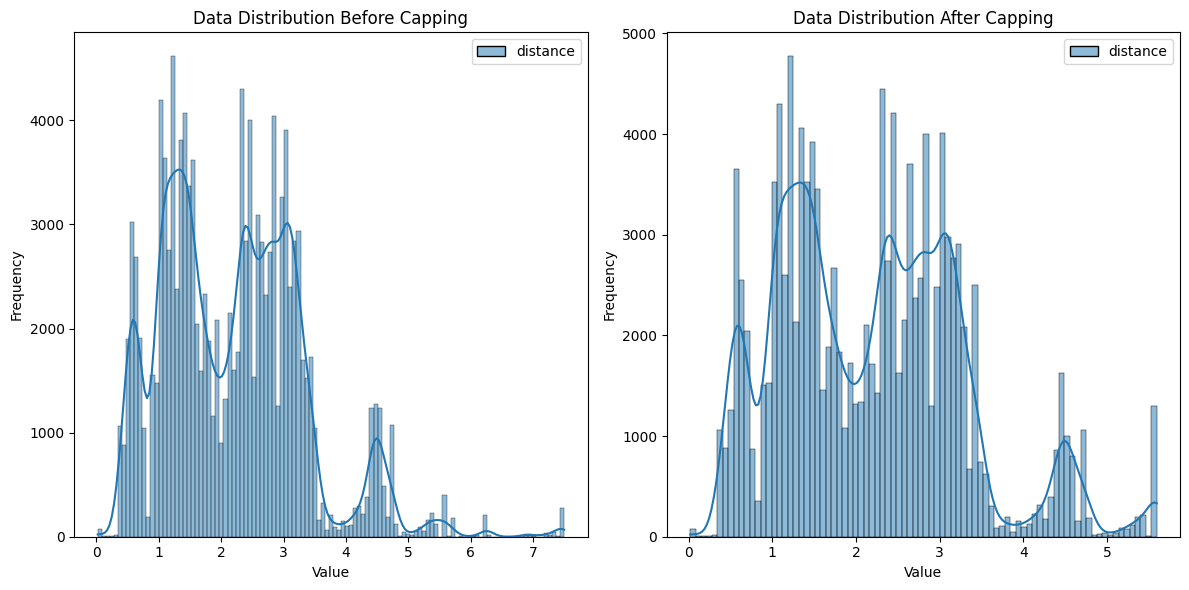

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data distribution before capping
sns.histplot(X_test_num, kde=True, color='yellow', ax=axes[0])
axes[0].set_title('Data Distribution Before Capping')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Plot data distribution after capping
sns.histplot(X_test_capped, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Data Distribution After Capping')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Terlihat dari visualisasi, bahwa distribusi data semakin mendekati normal

### Price / Target

In [ ]:
y_train.skew()

1.0398374005843536

y_train dan y_test memiliki skewness ekstrem diatas 1

In [ ]:
y_test.skew()

1.068805600976993

Karena skewness ekstrem maka kita akan menggunakan median sebagai imputasi atau mengganti data outlier

In [ ]:
# Create a SimpleImputer for median imputation
imputer = SimpleImputer(strategy='median')

# Fit and transform y_train
y_train_imputer = imputer.fit_transform(pd.DataFrame(y_train))

# Transform y_test using the same imputer
y_test_imputer = imputer.transform(pd.DataFrame(y_test))

# Convert the imputed arrays to dataframe
y_train_imputed = pd.DataFrame(y_train_imputer, columns=['y_train'])
y_test_imputed = pd.DataFrame(y_test_imputer, columns=['y_test'])


Saya menggunakan median untuk imputasi y_train dan y_test adalah keduanya memiliki skewness ekstrem. Maka, imputasi yang paling tepat adalah menggunakan median

In [ ]:
y_train_imputed

,y_train
0,30.5
1,12.5
2,10.5
3,38.5
4,34.0
...,...
510375,10.5
510376,10.5
510377,6.5
510378,15.0


Menampilkan dataframe y_train setelah dilakukan imputasi

In [ ]:
y_test_imputed

,y_test
0,17.0
1,9.0
2,9.0
3,7.0
4,10.0
...,...
127591,25.5
127592,22.5
127593,13.5
127594,37.5


Menampilkan dataframe y_test setelah dilakukan imputasi

## J. Feature Scaling


Langkah ini merupakan proses mengubah rentang nilai dari fitur-fitur dalam dataset sehingga mereka memiliki skala yang serupa atau terstandarisasi. Hal ini dilakukan untuk mengoptimalkan kinerja algoritma pembelajaran mesin yang sensitif terhadap perbedaan skala antara fitur-fitur.

In [ ]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fitting dan transforming pada data training numerik
X_train_scaling = scaler.fit_transform(X_train_num)

# Transformasi pada data numerik test
X_test_scaling = scaler.transform(X_test_num)

Membuat inisialisasi untuk standardscaler dan melakukan .fit.transform untuk X_train_num dan .fit untuk X_test_num. Saya memilih standardscaler karena data sudah dihandling dari outlier sehingga distribusi data normal.

In [ ]:
# Convert the result of the transformation to a DataFrame with the appropriate column names
X_train_scaling = pd.DataFrame(X_train_scaling, columns=X_train_num.columns)
X_test_scaling = pd.DataFrame(X_test_scaling, columns=X_train_num.columns)

Setelah melakukan scaling, maka hasil scaling untuk masing-masing X_train_num dan X_test_num dijadikan dataframe yang berbeda

In [ ]:
# Show dataframe
X_train_scaling

,distance
0,0.573924
1,-0.686508
2,0.609181
3,2.072340
4,0.723766
...,...
510375,0.415268
510376,0.573924
510377,-1.911684
510378,-0.510224


Menampilkan hasil scaling untuk X_train_scaling

In [ ]:
# Show dataframe
X_test_scaling

,distance
0,-1.012634
1,0.573924
2,-1.470974
3,-0.404454
4,-0.236984
...,...
127591,0.723766
127592,0.388826
127593,-0.404454
127594,0.776651


Menampilkan hasil scaling untuk X_test_scaling

## K. Feature Encoding


Langkah ini merupakan proses mengubah data kategorikal (non-numerik) menjadi bentuk numerik, sehingga dapat digunakan dalam algoritma pembelajaran mesin yang memerlukan input numerik.

In [ ]:
cat_feature = ['name']

#Create a OneHotEncoder object by specifying the category fields to encode
encoder = OneHotEncoder(sparse=False, categories='auto')

# Train the encoder on the training data and transform the training data
X_train_ohe = encoder.fit_transform(X_train_cat)

# Transform the test data using the same encoder
X_test_ohe = encoder.transform(X_test_cat)

/Users/valdi/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_ohe

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

Saya memilih OneHotEncoder karena value dari kolom 'name' tidak mempunyai urutan/non-ordinal. Jadi, metode OneHotEncoder merupakan cara yang tepat untuk feature encoding. Dan saya melakukan .fit.transform untuk X_train_cat dan .fit untuk X_test_cat

In [ ]:
# Convert the result of the transformation to a DataFrame with the appropriate column names
feature_names= encoder.get_feature_names_out(input_features= cat_feature)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names)
X_test_ohe= pd.DataFrame(X_test_ohe, columns=feature_names)

Setelah melakukan encoding, maka hasil encoding untuk masing-masing X_train_cat dan X_test_cat dijadikan dataframe yang berbeda

In [ ]:
# Show dataframe
X_train_ohe

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
510376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
510377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
510378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Menampilkan hasil encoding untuk X_test_ohe

In [ ]:
# Show dataframe
X_test_ohe

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127592,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127593,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menampilkan hasil encoding untuk X_test_ohe

## L. Concatenate column


Langkah ini dilakukan untuk menggabungkan dua atau lebih kolom atau beberapa dataframe menjadi satu.

In [ ]:
# Reset index for some dataframe
X_train_scaling.reset_index(drop=True, inplace=True)
X_train_surge.reset_index(drop=True, inplace=True)
X_test_scaling.reset_index(drop=True, inplace=True)
X_test_surge.reset_index(drop=True, inplace=True)

In [ ]:
# Merge the two DataFrames that we have transformed features
X_train_final = pd.concat([X_train_scaling, X_train_ohe, X_train_surge], axis=1)
X_test_final = pd.concat([X_test_scaling, X_test_ohe, X_test_surge], axis=1)

Menggabungkan kedua dataframe yang sudah di scaling dan encoding sebelumnya, lalu menyatukannya sesuai dengan X_train atau X_test. Dataframe final inilah yang akan digunakan dalam pemodelan

In [ ]:
# Show dataframe
X_train_final

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier
0,0.573924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.686508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.609181,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.072340,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.723766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.415268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
510376,0.573924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
510377,-1.911684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
510378,-0.510224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Menampilkan hasil concatenate untuk X_train_final

In [ ]:
# Show dataframe
X_test_final

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier
0,-1.012634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.573924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.470974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.404454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.236984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127591,0.723766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127592,0.388826,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127593,-0.404454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127594,0.776651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Menampilkan hasil concatenate untuk X_test_final

Saya mengubah menjadi tipe string agar menjadi satu data tipe antar 2 X_train dan X_test agar dapat dimodelkan nantinya. 

# **vi. Model Definition**


Langkah ini dilakukan untuk mendefinisikan struktur, arsitektur, dan parameter dari model yang akan digunakan dalam analisis data atau pembelajaran mesin.

In [ ]:
# Create an instance of the Linear Regression model
model_lin_reg = LinearRegression()

- Alasan saya menggunakan Linear Regression adalah saya ingin memprediksi nilai price berdasarkan fitur-fitur dengan asumsi hubungan linear seperti distance. Linear Regression merupakan pilihan yang tepat karena model linear regression adalah model yang relatif sederhana dan memiliki sedikit parameter yang bisa diatur.
- Metrics yang saya gunakan nantinya adalah Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (Coefficient of Determination) Score (R2 Score), dan Mean Absolute Percentage Error (MAPE).


# **vii. Model Training**


Langkah ini dilakukan untuk melatih model machine learning yang sebelumnya telah didefinisikan

In [ ]:
# Train model
model_lin_reg.fit(X_train_final, y_train_imputed)

LinearRegression()

Pada langkah ini, kita mulai melakukan pelatihan pada model regresi linear menggunakan .fit dengan menguji X_train_final dengan y_train_imputed


In [ ]:
# Make predictions on data train
y_pred_train = model_lin_reg.predict(X_train_final)

# Make predictions on data test
y_pred_test = model_lin_reg.predict(X_test_final)

Pada langkah ini mulai dilakukan training model dengan menguji X_train_final dengan y_pred_train dan y_pred_test dengan X_test_final

In [ ]:
# Create a dataframe y_pred_train_df from the predicted results of y_pred_train
result_y_pred_train = pd.DataFrame(y_pred_train)

# # membuat nama untuk fitur name untuk X test
name_col = { 0:'price'}
            
# X_test_final = X_test_final.rename(columns = name_col2 )
# Show dataframe
result_y_pred_train = result_y_pred_train.rename(columns = name_col)

result_y_pred_train

,price
0,32.086273
1,13.496918
2,10.856293
3,38.203705
4,33.926117
...,...
510375,11.069977
510376,11.581146
510377,2.704865
510378,14.056122


Hasil pengujian pada y_pred_train akan disimpan ke dataframe result_y_pred_train

In [ ]:
# Create a dataframe y_pred_test_df from the predicted results of y_pred_test
result_y_pred_test = pd.DataFrame(y_pred_test)

# # membuat nama untuk fitur name untuk X test
name_col2 = { 0:'price'}
            
# X_test_final = X_test_final.rename(columns = name_col2 )
# Show dataframe
result_y_pred_test = result_y_pred_test.rename(columns = name_col2)

result_y_pred_test

,price
0,17.303253
1,10.588959
2,11.008698
3,4.744904
4,8.016876
...,...
127591,22.810944
127592,18.327911
127593,15.811737
127594,32.729340


Hasil pengujian pada y_pred_test akan disimpan ke dataframe result_y_pred_test

# **viii. Model Evaluation**


Langkah ini dilakukan untuk melakukan pengujian terhadap model yang sudah ditrain sebelumnya

### 1. Mean Absolute Error (MAE)

MAE mengukur rata-rata dari nilai absolut perbedaan antara nilai prediksi dan nilai sebenarnya

In [ ]:
# Calculate MAE train and test
mae_train = mean_absolute_error(y_train_imputed, y_pred_train)
mae_test = mean_absolute_error(y_test_imputed, y_pred_test)

# Show result
print('Nilai rata-rata dari price adalah:', format(y.mean(), ".1f"))
print('MAE train =', format(mae_train, ".3f"))
print('MAE test =', format(mae_test, ".3f"))

Nilai rata-rata dari price adalah: 16.5
MAE train = 1.774
MAE test = 1.785


- Nilai MAE pada kedua Train-Set dan Test-Set lebih rendah daripada nilai rata-rata target (16.5). Ini menunjukkan bahwa model secara umum memberikan prediksi yang lebih akurat daripada hanya menggunakan rata-rata sebagai prediksi.

### 2. Mean Squared Error (MSE):

MSE mengukur rata-rata dari kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MSE, semakin baik modelnya.

In [ ]:
# Calculate MSE train and test
mse_train = mean_squared_error(y_train_imputed, y_pred_train)
mse_test = mean_squared_error(y_test_imputed, y_pred_test)

# Show result
print('Nilai rata-rata dari price adalah:', format(y.mean(), ".1f"))
print('MSE train =', format(mse_train, ".3f"))
print('MSE test =', format(mse_test, ".3"))

Nilai rata-rata dari price adalah: 16.5
MSE train = 6.299
MSE test = 6.42


- Nilai MSE pada kedua Train-Set dan Test-Set lebih rendah daripada kuadrat dari nilai rata-rata target. Ini menunjukkan bahwa model secara umum memiliki tingkat kesalahan yang lebih rendah daripada hanya menggunakan rata-rata sebagai prediksi.
- Perbedaan yang sangat kecil antara MSE pada Train-Set dan Test-Set adalah tanda bahwa model memiliki kinerja yang relatif konsisten pada data pelatihan dan data pengujian.

### 3. Root Mean Squared Error (RMSE)

RMSE adalah akar kuadrat dari MSE dan memberikan gambaran sejauh mana kesalahan prediksi model dalam satuan asli dari data.

In [ ]:
# Calculates RMSE train and test
rmse_train = np.sqrt(mean_squared_error(y_train_imputed, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test_imputed, y_pred_test))

# Show result
print('Nilai rata-rata dari price adalah:', format(y.mean(), ".1f"))
print('RMSE train =', format(rmse_train, ".3f"))
print('RMSE test =', format(rmse_test, ".3f"))

Nilai rata-rata dari price adalah: 16.5
RMSE train = 2.510
RMSE test = 2.534


- Karena RMSE adalah suatu ukuran kesalahan prediksi dalam satuan yang sama dengan variabel target, dapat dilihat bahwa nilai RMSE pada kedua Train-Set dan Test-Set (sekitar 2.51 dan 2.52) lebih rendah daripada nilai rata-rata target (16.5). Ini menunjukkan bahwa model secara umum memiliki tingkat kesalahan yang lebih rendah daripada hanya menggunakan rata-rata sebagai prediksi.
- Perbedaan yang sangat kecil antara RMSE pada Train-Set dan Test-Set (kurang dari 0.03) adalah tanda bahwa model memiliki kinerja yang relatif konsisten pada data pelatihan dan data pengujian. 

### 4. R-Squared(Coefficient of Determination)

R-squared mengukur seberapa baik variabilitas dalam variabel dependen dapat dijelaskan oleh variabel independen dalam model. Nilai R-squared berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik modelnya.

In [ ]:
# Calculating the value of R-squared train and test
r2_train = r2_score(y_train_imputed, y_pred_train)
r2_test = r2_score(y_test_imputed, y_pred_test)

# Show result
print('Nilai R-squared train =', format(r2_train, ".3f"))
print('Nilai R-squared test =', format(r2_test, ".3f"))

# Convert the R-squared value to a percentage
r2_train_percentage = r2_train * 100
r2_test_percentage = r2_test * 100

#SHow result
print('Nilai R-squared train = {:.1f}%'.format(r2_train_percentage))
print('Nilai R-squared test = {:.1f}%'.format(r2_test_percentage))

Nilai R-squared train = 0.927
Nilai R-squared test = 0.927
Nilai R-squared train = 92.7%
Nilai R-squared test = 92.7%


- Nilai R-squared (R2) yang mendekati 1 (nilai maksimal) menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan variasi dalam data. Dalam hal ini, nilai R-squared yang mendekati 0.92 pada kedua Train-Set dan Test-Set menunjukkan bahwa model berhasil menjelaskan sekitar 92% variabilitas dalam data target.

### 5. Mean Absolute Percentage Error (MAPE) 

Mean Absolute Percentage Error (MAPE) adalah metrik evaluasi yang digunakan untuk mengukur tingkat kesalahan relatif dari model regresi.

In [ ]:
# Calculating MAPE train and test
mape_train = np.mean(np.abs((y_train_imputed - y_pred_train) / y_train_imputed)) * 100
mape_test = np.mean(np.abs((y_test_imputed - y_pred_test) / y_test_imputed)) * 100

# Show result
print('MAPE train = ', np.round(mean_absolute_percentage_error(y_train_imputed, y_pred_train)*100))
print('MAPE test = ', np.round(mean_absolute_percentage_error(y_test_imputed, y_pred_test)*100))

MAPE train =  13.0
MAPE test =  14.0


/Users/valdi/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/valdi/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- MAPE mengukur rata-rata kesalahan prediksi sebagai persentase dari nilai aktual pada dataset. Nilai MAPE pada Train-Set sekitar 13.0% dan pada Test-Set sekitar 14.0%. Ini berarti rata-rata kesalahan prediksi pada Train-Set adalah sekitar 13% dari nilai aktual, dan pada Test-Set sekitar 14% dari nilai aktual.

# **ix. Model Saving**


Langkah ini dilakukan guna menyimpan model yang sudah akan digunakan pada data inference

In [ ]:
# Model Saving

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_lin_reg.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3)